ข้อมูลการเกิดอุบัติเหตุทางถนน: https://www.data.go.th/en/dataset/accident  
dataset: accident_dataset_177816.csv

คำอธิบาย  
ACCIDENT_COST     มูลค่าทรัพย์สินที่เสียหาย  
HUMAN_ADMIT       จำนวนผู้รักษาตัวในโรงพยาบาล  
HUMAN_DEAD        จำนวนผู้เสียชีวิต  
ROADTYPE_ID       {1:"ถนนกรมทางหลวง", 2:"ถนนกรมทางหลวงชนบท", 3:"ถนนในเมือง (เทศบาล)", 4:"ถนนใน อบต. หมู่บ้าน", 5:"อื่นๆ"}  
ROADSKIN_ID       {1:"แห้ง", 2:"เปียก", 3:"เป็นคลื่น หลุมบ่อ", 4:"อื่นๆ"}  
ACDPOINT_ID       {1:"ทางตรง", 2:"ทางโค้ง", 3:"ทางแยก", 4:"ทางคนข้าม", 5:"ทางมีสิ่งกีดขวาง", 6:"อื่นๆ"}  
ATMOSPHERE_ID     {1:"แจ่มใส", 2:"มีหมอก", 3:"ฝนตก", 4:"ควัน ฝุ่น", 5:"อื่นๆ"}  
LIGHT_ID          {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"}  
PERSON_GENDER     {1:"ชาย", 2:"หญิง"}  
PERSON_AGE        อายุผู้ขับขี่  
PERSON_STATE      {0:"บาดเจ็บ", 1:"เสียชีวิตในที่เกิดเหตุ", 2:"เสียชีวิตในเวลาต่อมา"}


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# %config InlineBackend.figure_formats='retina'

## import dataset

In [2]:
# read csv file
uri = 'data/accident_dataset_177816.csv'
df_raw = pd.read_csv(uri)

In [3]:
df_raw.head()

,ACCIDENT_ID,LOCATE_ID_DISTRICT,LOCATE_ID_POLICE,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,...,GIS_LNG,PERSON_GENDER,PERSON_AGE,PERSON_TYPE,PERSON_STATE,LOCATE_PROVINCE,LOCATE_DOMICILE,LOCATE_AREATYPE,HEALTH_DEADPLACE,HEALTH_EMSSEND
0,140163,100484,0,4,13,118000,2,0,1,1,...,103.627313,1,19,3,0,1052,1052,0,0,50
1,140164,100484,0,4,13,118000,2,0,1,1,...,103.627313,1,16,2,0,1052,1052,0,0,50
2,140165,100545,0,4,13,59000,1,0,4,1,...,104.820646,1,40,2,0,1056,1056,0,0,20
3,140166,100905,0,4,13,49000,1,0,4,1,...,99.594361,1,14,2,0,1091,1091,0,0,20
4,140167,100724,0,4,13,0,1,0,4,1,...,100.514021,1,32,2,0,1072,1072,0,0,20


In [4]:
df_raw.shape

(37654, 26)

In [5]:
# check data type
df_raw.dtypes

ACCIDENT_ID             int64
LOCATE_ID_DISTRICT      int64
LOCATE_ID_POLICE        int64
ACCIDENT_MONTH          int64
ACCIDENT_YEAR           int64
ACCIDENT_COST           int64
HUMAN_ADMIT             int64
HUMAN_DEAD              int64
ROADTYPE_ID             int64
ROADSKIN_ID             int64
ACDPOINT_ID             int64
ATMOSPHERE_ID           int64
LIGHT_ID                int64
GIS_E                   int64
GIS_N                   int64
GIS_LAT               float64
GIS_LNG               float64
PERSON_GENDER           int64
PERSON_AGE              int64
PERSON_TYPE             int64
PERSON_STATE            int64
LOCATE_PROVINCE         int64
LOCATE_DOMICILE         int64
LOCATE_AREATYPE         int64
HEALTH_DEADPLACE        int64
HEALTH_EMSSEND          int64
dtype: object

In [6]:
# check columns name
df_raw.columns

Index(['ACCIDENT_ID', 'LOCATE_ID_DISTRICT', 'LOCATE_ID_POLICE',
       'ACCIDENT_MONTH', 'ACCIDENT_YEAR', 'ACCIDENT_COST', 'HUMAN_ADMIT',
       'HUMAN_DEAD', 'ROADTYPE_ID', 'ROADSKIN_ID', 'ACDPOINT_ID',
       'ATMOSPHERE_ID', 'LIGHT_ID', 'GIS_E', 'GIS_N', 'GIS_LAT', 'GIS_LNG',
       'PERSON_GENDER', 'PERSON_AGE', 'PERSON_TYPE', 'PERSON_STATE',
       'LOCATE_PROVINCE', 'LOCATE_DOMICILE', 'LOCATE_AREATYPE',
       'HEALTH_DEADPLACE', 'HEALTH_EMSSEND'],
      dtype='object')

## Preparing data  
if have change, can start from here.

In [7]:
''' drop unnecessary columns '''

columns_to_keep = [
    'ACCIDENT_MONTH', 'ACCIDENT_YEAR', 'ACCIDENT_COST', 'HUMAN_ADMIT',
    'HUMAN_DEAD', 'ROADTYPE_ID', 'ROADSKIN_ID', 'ACDPOINT_ID',
    'ATMOSPHERE_ID', 'LIGHT_ID', 'PERSON_GENDER', 'PERSON_AGE', 'PERSON_STATE'
]
columns_to_drop = [
    'ACCIDENT_ID', 'LOCATE_ID_DISTRICT', 'LOCATE_ID_POLICE',
    'GIS_E', 'GIS_N', 'GIS_LAT', 'GIS_LNG',
    'PERSON_TYPE', 'LOCATE_PROVINCE', 'LOCATE_DOMICILE',
    'LOCATE_AREATYPE', 'HEALTH_DEADPLACE', 'HEALTH_EMSSEND'
]

# drop unnecessary columns
df = df_raw.drop(columns_to_drop, axis=1)

In [8]:
df.head()

,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE,PERSON_STATE
0,4,13,118000,2,0,1,1,3,1,3,1,19,0
1,4,13,118000,2,0,1,1,3,1,3,1,16,0
2,4,13,59000,1,0,4,1,2,1,1,1,40,0
3,4,13,49000,1,0,4,1,2,1,1,1,14,0
4,4,13,0,1,0,4,1,1,1,3,1,32,0


In [9]:
''' create date column (date type) '''

df['date'] = '' # create new date column

# extract month year into date column
for idx, row in df.iterrows():
    j = str(row.ACCIDENT_MONTH)
    k = '20'+str(row.ACCIDENT_YEAR)
    df['date'][idx] = j + '/' + '01' + '/' + k # hard code day '01' for all dafaframe
    
# convert str to date type
df['date'] = pd.to_datetime(df['date'])

# drop old month, year columns
col = ['ACCIDENT_MONTH', 'ACCIDENT_YEAR']
df = df.drop(columns=col, axis=1)

In [10]:
df.sample(10).sort_index()

,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE,PERSON_STATE,date
3932,0,1,0,4,1,1,1,1,1,23,0,2013-04-01
4694,59000,1,0,4,1,1,1,1,1,61,0,2014-10-01
5632,8000,1,0,1,1,2,2,1,1,55,0,2011-12-01
8113,0,1,0,2,1,2,2,1,2,19,0,2014-07-01
13681,300000,0,3,1,1,2,1,2,2,18,1,2012-04-01
15163,50000,1,1,1,1,1,1,1,1,58,1,2012-03-01
16412,0,1,0,1,1,2,1,1,1,31,0,2013-04-01
17378,59000,1,0,3,1,1,1,2,1,43,0,2015-01-01
24476,0,1,0,3,90,90,90,1,2,23,0,2015-01-01
31538,120000,2,0,3,1,1,1,3,2,17,0,2014-07-01


In [11]:
''' no need to encode data but data in these columns should be category not an integer '''

columns_to_category = [
    'ROADTYPE_ID','ROADSKIN_ID', 'ACDPOINT_ID',
    'ATMOSPHERE_ID', 'LIGHT_ID', 'PERSON_STATE',
    'PERSON_GENDER'
]

# change data type to catagory
for col in columns_to_category:
    df[col] = df[col].astype('category', copy=False)

In [12]:
# check
df.dtypes

ACCIDENT_COST             int64
HUMAN_ADMIT               int64
HUMAN_DEAD                int64
ROADTYPE_ID            category
ROADSKIN_ID            category
ACDPOINT_ID            category
ATMOSPHERE_ID          category
LIGHT_ID               category
PERSON_GENDER          category
PERSON_AGE                int64
PERSON_STATE           category
date             datetime64[ns]
dtype: object

In [13]:
''' ผู้บันทึกข้อมูลระบุ --> ACCIDENT_COST บางข้อมูลใส่ 0 หมายถึง ไม่มีค่าใช้จ่ายเกิดขึ้น หรือ ผู้คีย์ข้อมูลไม่ได้บันทึกข้อมูลค่าใช้จ่ายเข้ามาในระบบ '''

# replace 0 to NaN
df['ACCIDENT_COST'].replace(0, np.nan, inplace=True)

# remove row with NaN
df.dropna(axis=0, inplace=True)

In [14]:
df.head()

,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE,PERSON_STATE,date
0,118000.0,2,0,1,1,3,1,3,1,19,0,2013-04-01
1,118000.0,2,0,1,1,3,1,3,1,16,0,2013-04-01
2,59000.0,1,0,4,1,2,1,1,1,40,0,2013-04-01
3,49000.0,1,0,4,1,2,1,1,1,14,0,2013-04-01
5,4008000.0,0,1,3,1,1,1,2,2,16,1,2013-03-01


In [15]:
'''ผู้บันทึกข้อมูลระบุ --> ROADTYPE_ID, ROADSKIN_ID, ACDPOINT_ID, ATMOSPHERE_ID, LIGHT_ID ค่า 90 เป็นค่าว่างของฐานข้อมูล ที่ระบบยินยอมให้ผู้ใช้เลือกไม่ระบุ'''

columns_to_replace = ['ROADTYPE_ID', 'ROADSKIN_ID', 'ACDPOINT_ID', 'ATMOSPHERE_ID', 'LIGHT_ID']

# replace 90 to NaN
for i in columns_to_replace:
    df[i].replace(90, np.nan, inplace=True)

# remove row with NaN
df.dropna(axis=0, inplace=True)

In [16]:
# check nan
df.isnull().sum()

ACCIDENT_COST    0
HUMAN_ADMIT      0
HUMAN_DEAD       0
ROADTYPE_ID      0
ROADSKIN_ID      0
ACDPOINT_ID      0
ATMOSPHERE_ID    0
LIGHT_ID         0
PERSON_GENDER    0
PERSON_AGE       0
PERSON_STATE     0
date             0
dtype: int64

In [17]:
''' check ACCIDENT_COST median at 59000 '''
df['ACCIDENT_COST'].describe()

count    2.104000e+04
mean     1.127165e+06
std      3.397244e+06
min      1.000000e+00
25%      3.000000e+04
50%      5.900000e+04
75%      2.000000e+05
max      9.000000e+07
Name: ACCIDENT_COST, dtype: float64

In [18]:
''' limit max ACCIDENT_COST below 100000 '''

df = df[ df['ACCIDENT_COST'] < 100000]
df['ACCIDENT_COST'].describe()

count    13957.000000
mean     39778.292541
std      23674.651404
min          1.000000
25%      15000.000000
50%      50000.000000
75%      59000.000000
max      99000.000000
Name: ACCIDENT_COST, dtype: float64

In [19]:
''' unusual PERSON_AGE at 999 '''
df['PERSON_AGE'].describe()

count    13957.000000
mean        34.302930
std         28.828263
min          1.000000
25%         20.000000
50%         31.000000
75%         45.000000
max        999.000000
Name: PERSON_AGE, dtype: float64

In [20]:
''' PERSON_AGE must <= 100 '''
df = df[ df['PERSON_AGE'] <= 100]

In [21]:
''' basic statistic on PERSON_AGE mean at 34 
while interquartile range 25% - 75% of age is between 20-45 '''
df['PERSON_AGE'].describe()
# new dataframe
# df_young = df[ (df['PERSON_AGE'] <= 46) & (df['PERSON_AGE'] >= 20)]
# df_young['PERSON_AGE'].describe()

count    13946.000000
mean        33.705794
std         16.931939
min          1.000000
25%         20.000000
50%         31.000000
75%         45.000000
max         90.000000
Name: PERSON_AGE, dtype: float64

In [22]:
''' basic statistic on mean of ACCIDENT_COST by PERSON_GENDER 
not much difference'''

df.groupby('PERSON_GENDER')[['ACCIDENT_COST']].mean()

,ACCIDENT_COST
PERSON_GENDER,
1,39546.326377
2,40312.991706


## Data Visualization

In [23]:
'''
ACCIDENT_COST   มูลค่าทรัพย์สินที่เสียหาย  
HUMAN_ADMIT     จำนวนผู้รักษาตัวในโรงพยาบาล  
HUMAN_DEAD      จำนวนผู้เสียชีวิต  
ROADTYPE_ID     {1:"ถนนกรมทางหลวง", 2:"ถนนกรมทางหลวงชนบท", 3:"ถนนในเมือง (เทศบาล)", 4:"ถนนใน อบต. หมู่บ้าน", 5:"อื่นๆ"}  
ROADSKIN_ID     {1:"แห้ง", 2:"เปียก", 3:"เป็นคลื่น หลุมบ่อ", 4:"อื่นๆ"}  
ACDPOINT_ID     {1:"ทางตรง", 2:"ทางโค้ง", 3:"ทางแยก", 4:"ทางคนข้าม", 5:"ทางมีสิ่งกีดขวาง", 6:"อื่นๆ"}  
ATMOSPHERE_ID   {1:"แจ่มใส", 2:"มีหมอก", 3:"ฝนตก", 4:"ควัน ฝุ่น", 5:"อื่นๆ"}  
LIGHT_ID        {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"}  
PERSON_GENDER   {1:"ชาย", 2:"หญิง"}  
PERSON_AGE      อายุผู้ขับขี่  
PERSON_STATE    {0:"บาดเจ็บ", 1:"เสียชีวิตในที่เกิดเหตุ", 2:"เสียชีวิตในเวลาต่อมา"}
'''

'\nACCIDENT_COST   มูลค่าทรัพย์สินที่เสียหาย  \nHUMAN_ADMIT     จำนวนผู้รักษาตัวในโรงพยาบาล  \nHUMAN_DEAD      จำนวนผู้เสียชีวิต  \nROADTYPE_ID     {1:"ถนนกรมทางหลวง", 2:"ถนนกรมทางหลวงชนบท", 3:"ถนนในเมือง (เทศบาล)", 4:"ถนนใน อบต. หมู่บ้าน", 5:"อื่นๆ"}  \nROADSKIN_ID     {1:"แห้ง", 2:"เปียก", 3:"เป็นคลื่น หลุมบ่อ", 4:"อื่นๆ"}  \nACDPOINT_ID     {1:"ทางตรง", 2:"ทางโค้ง", 3:"ทางแยก", 4:"ทางคนข้าม", 5:"ทางมีสิ่งกีดขวาง", 6:"อื่นๆ"}  \nATMOSPHERE_ID   {1:"แจ่มใส", 2:"มีหมอก", 3:"ฝนตก", 4:"ควัน ฝุ่น", 5:"อื่นๆ"}  \nLIGHT_ID        {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"}  \nPERSON_GENDER   {1:"ชาย", 2:"หญิง"}  \nPERSON_AGE      อายุผู้ขับขี่  \nPERSON_STATE    {0:"บาดเจ็บ", 1:"เสียชีวิตในที่เกิดเหตุ", 2:"เสียชีวิตในเวลาต่อมา"}\n'

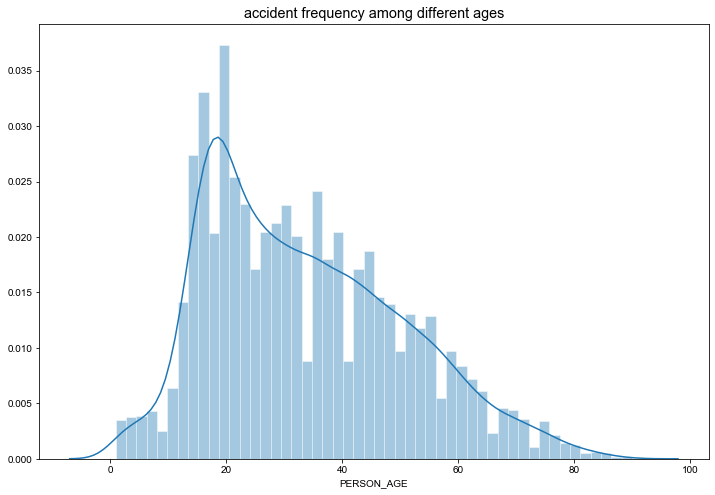

In [24]:
''' accident frequency among different ages '''
''' person age 18 - 40 had high frequency to got accident '''
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('accident frequency among different ages')
ax = sns.distplot(df['PERSON_AGE'], bins=50)

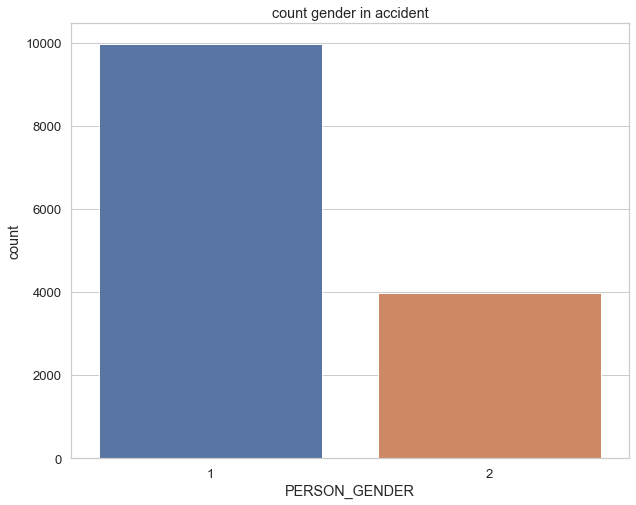

In [25]:
''' count plot PERSON_GENDER {1:"ชาย", 2:"หญิง"}  '''
''' found male had more accident record than female
(cannot imply which gender drive bad because we don't know the actual total number of driver for both male and female)'''

plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('count gender in accident')
ax = sns.countplot(x='PERSON_GENDER',data=df)

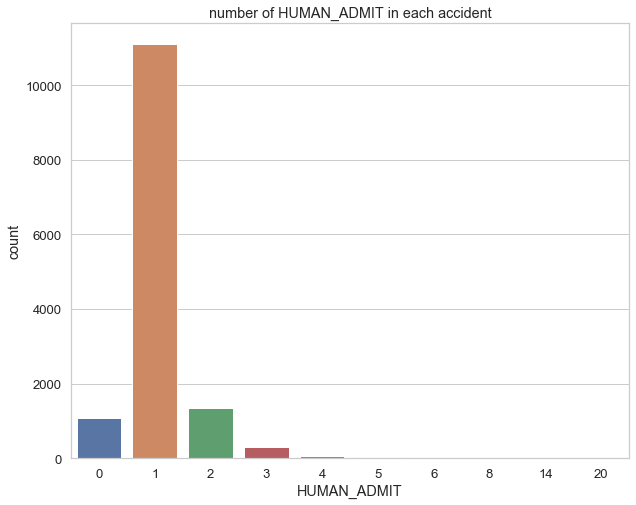

In [26]:
''' count plot HUMAN_ADMIT จำนวนผู้รักษาตัวในโรงพยาบาล
in each accident, there is 1 person admited in a hospital'''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('number of HUMAN_ADMIT in each accident')
ax = sns.countplot(x='HUMAN_ADMIT', data=df)

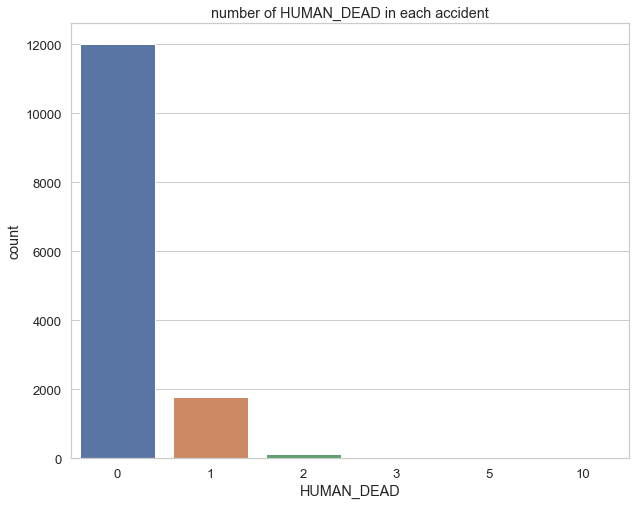

In [27]:
''' count plot HUMAN_DEAD      จำนวนผู้เสียชีวิต  
Fortunately, most case are 0 dead person'''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('number of HUMAN_DEAD in each accident')
ax = sns.countplot(x='HUMAN_DEAD', data=df)

In [28]:
'''
check factors
ROADTYPE_ID     {1:"ถนนกรมทางหลวง", 2:"ถนนกรมทางหลวงชนบท", 3:"ถนนในเมือง (เทศบาล)", 4:"ถนนใน อบต. หมู่บ้าน", 5:"อื่นๆ"}  
ROADSKIN_ID     {1:"แห้ง", 2:"เปียก", 3:"เป็นคลื่น หลุมบ่อ", 4:"อื่นๆ"}  
ACDPOINT_ID     {1:"ทางตรง", 2:"ทางโค้ง", 3:"ทางแยก", 4:"ทางคนข้าม", 5:"ทางมีสิ่งกีดขวาง", 6:"อื่นๆ"}  
ATMOSPHERE_ID   {1:"แจ่มใส", 2:"มีหมอก", 3:"ฝนตก", 4:"ควัน ฝุ่น", 5:"อื่นๆ"}  
LIGHT_ID        {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"}  
'''

'\ncheck factors\nROADTYPE_ID     {1:"ถนนกรมทางหลวง", 2:"ถนนกรมทางหลวงชนบท", 3:"ถนนในเมือง (เทศบาล)", 4:"ถนนใน อบต. หมู่บ้าน", 5:"อื่นๆ"}  \nROADSKIN_ID     {1:"แห้ง", 2:"เปียก", 3:"เป็นคลื่น หลุมบ่อ", 4:"อื่นๆ"}  \nACDPOINT_ID     {1:"ทางตรง", 2:"ทางโค้ง", 3:"ทางแยก", 4:"ทางคนข้าม", 5:"ทางมีสิ่งกีดขวาง", 6:"อื่นๆ"}  \nATMOSPHERE_ID   {1:"แจ่มใส", 2:"มีหมอก", 3:"ฝนตก", 4:"ควัน ฝุ่น", 5:"อื่นๆ"}  \nLIGHT_ID        {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"}  \n'

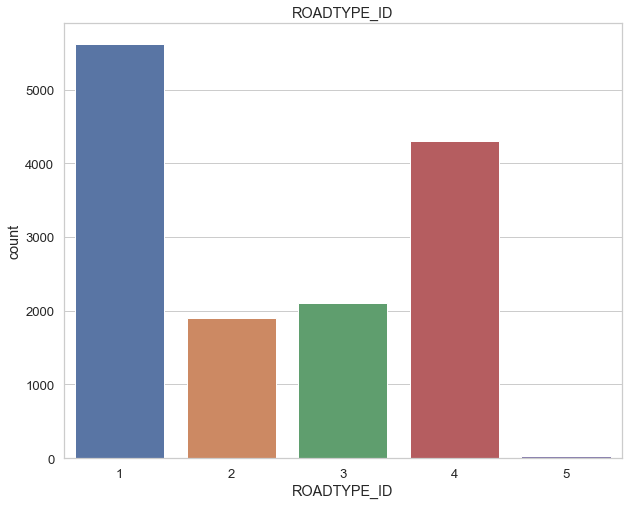

In [29]:
''' count plot ROADTYPE_ID {1:"ถนนกรมทางหลวง", 2:"ถนนกรมทางหลวงชนบท", 3:"ถนนในเมือง (เทศบาล)", 4:"ถนนใน อบต. หมู่บ้าน", 5:"อื่นๆ"}
the popular road that accident happened are Highway and local road in small town '''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('ROADTYPE_ID')
ax = sns.countplot(x='ROADTYPE_ID',data=df)

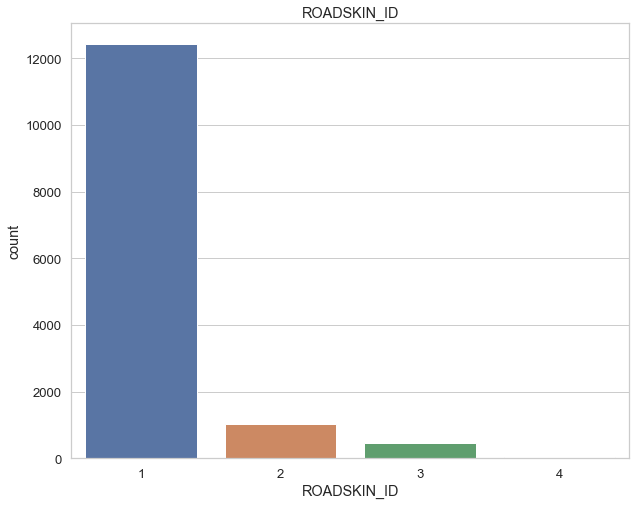

In [30]:
''' count plot ROADSKIN_ID {1:"แห้ง", 2:"เปียก", 3:"เป็นคลื่น หลุมบ่อ", 4:"อื่นๆ"}
When see the surface type, dry surface road has maximum count of accident'''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('ROADSKIN_ID')
ax = sns.countplot(x='ROADSKIN_ID',data=df)

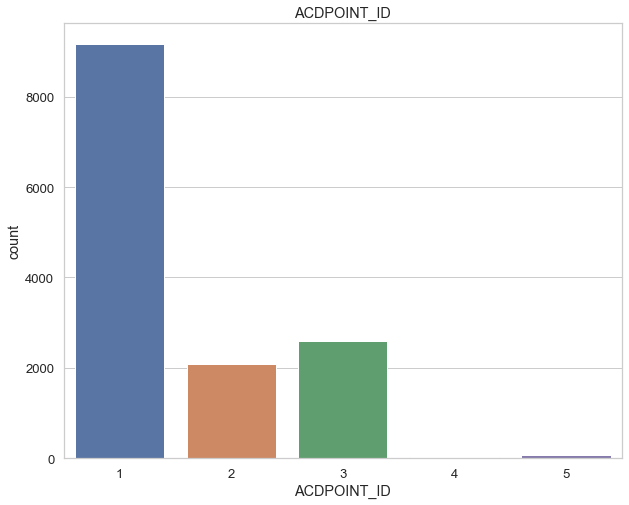

In [31]:
''' count plot ACDPOINT_ID {1:"ทางตรง", 2:"ทางโค้ง", 3:"ทางแยก", 4:"ทางคนข้าม", 5:"ทางมีสิ่งกีดขวาง", 6:"อื่นๆ"}
Also straight road had high ferquency of accident'''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('ACDPOINT_ID')
ax = sns.countplot(x='ACDPOINT_ID',data=df)

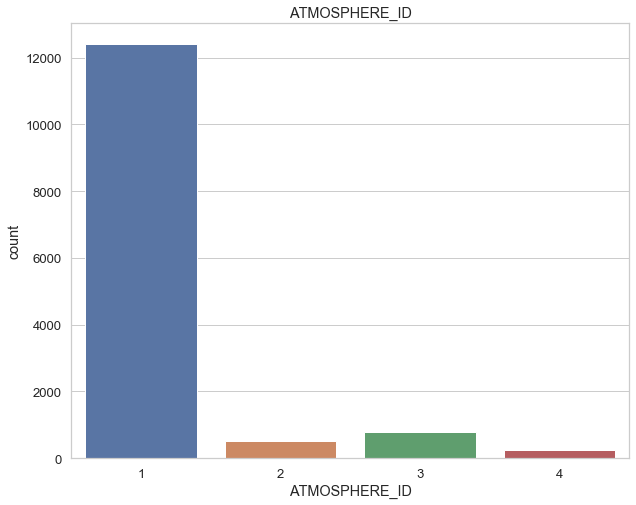

In [32]:
''' count plot ATMOSPHERE_ID {1:"แจ่มใส", 2:"มีหมอก", 3:"ฝนตก", 4:"ควัน ฝุ่น", 5:"อื่นๆ"}
high accident event in Sunny weather'''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('ATMOSPHERE_ID')
ax = sns.countplot(x='ATMOSPHERE_ID',data=df)

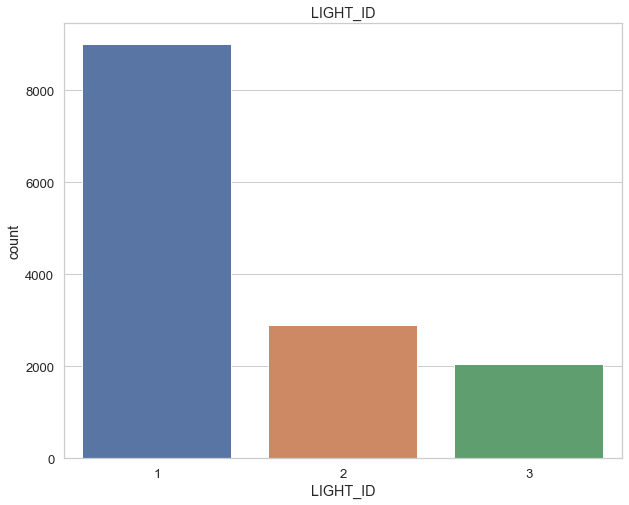

In [33]:
''' count plot LIGHT_ID {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"}
found more accident in Daytime  '''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title('LIGHT_ID')
ax = sns.countplot(x='LIGHT_ID',data=df)

mean accident cost sunnylight: 38733.97795947387
mean accident cost raindark: 45054.752808988764


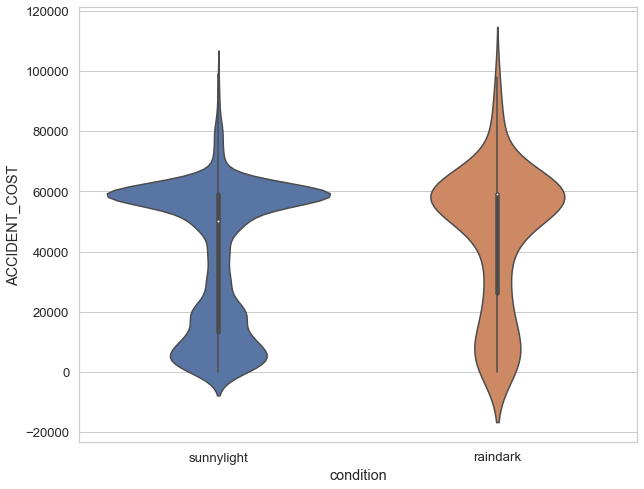

In [34]:
''' would like to check ACCIDENT_COST in two conditions
1. daytime & clear vision
2. nighttime without street light & rainning

result: mean accident cost raindark= 45054
while mean accident cost sunnylight= 38733
'''
# quick check daytime & clear vision
df.loc[ (df.LIGHT_ID == 1) & (df.ATMOSPHERE_ID == 1) ]

# quick check nighttime without street light & rainning
df.loc[ (df.LIGHT_ID == 3) & (df.ATMOSPHERE_ID == 3) ]

# new column for store attribute
df['condition'] = ''

for idx, row in df.iterrows():
    if (row.LIGHT_ID == 1) & (row.ATMOSPHERE_ID ==1):
        df['condition'][idx] = 'sunnylight'
    elif (row.LIGHT_ID == 3) & (row.ATMOSPHERE_ID ==3):
        df['condition'][idx] = 'raindark'
    else:
        df['condition'][idx] = np.nan

print("mean accident cost sunnylight:", df[ df['condition']=='sunnylight'].ACCIDENT_COST.mean())
print("mean accident cost raindark:", df[ df['condition']=='raindark'].ACCIDENT_COST.mean())

plt.subplots(figsize=(10, 8))
sns.violinplot(x='condition', y='ACCIDENT_COST', data=df.dropna(axis=0))

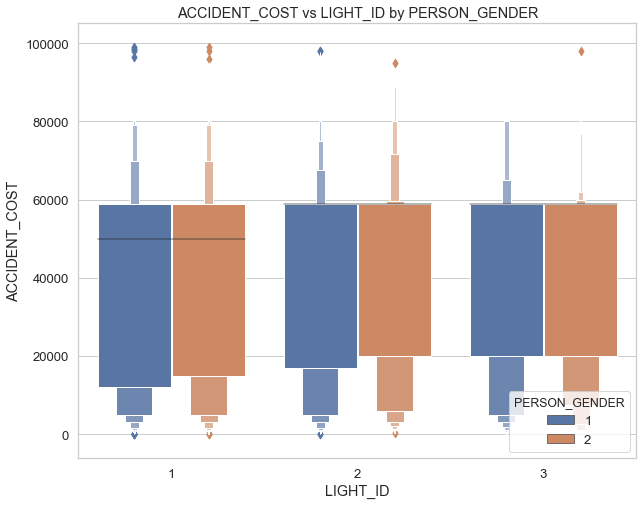

In [35]:
''' boxenplot ACCIDENT_COST vs LIGHT_ID {1:"กลางวัน", 2:"กลางคืนมีแสงไฟฟ้า", 3:"กลางคืนไม่มีแสงไฟฟ้า", 4:"อื่นๆ"} by PERSON_GENDER
not found interesting information  '''
plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.title("ACCIDENT_COST vs LIGHT_ID by PERSON_GENDER")
ax = sns.boxenplot(x='LIGHT_ID', y='ACCIDENT_COST', hue='PERSON_GENDER', data=df)

correlation

In [36]:
''' check correlation between factor, but not found interesting data 
-0.2 is not strong enough to have correlation, 
'''
df.corr()

,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,PERSON_AGE
ACCIDENT_COST,1.000000,-0.026912,-0.134697,-0.011468
HUMAN_ADMIT,-0.026912,1.000000,-0.240257,-0.096707
HUMAN_DEAD,-0.134697,-0.240257,1.000000,0.040935
PERSON_AGE,-0.011468,-0.096707,0.040935,1.000000


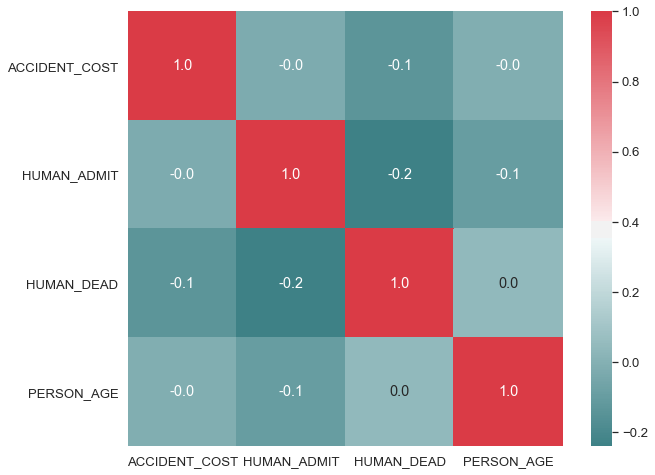

In [37]:
''' not found correlation between factors '''

fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
cmap_own = sns.diverging_palette(h_neg=200, h_pos=10, as_cmap=True)

sns.heatmap(
    corr, 
    mask=np.zeros_like(corr, dtype=np.bool), 
    cmap=cmap_own,
    square=True,
    ax=axis,
    annot=True, fmt='.1f'
    )

### This dataset is the record of road accident with the Department of Disaster Prevention and Mitigation. There has information in many fields such as personage, year & month, road type, weather, obstacle, day & night, etc. It is quite interesting to find useful information and lead the people to realize and prevent future accidents.  
  
### There are some interesting about the person age VS record of the accident. Many accidents occurred from the teenager that age between 17-20. Then the frequency was greatly decreased with age. Might because they already realize to pay attention. Another focusing factor is gender, found an accident record by male more than female. There are usually 1 person admitted in a hospital in each accident.  
  
### Next there are record about “Environment” at the accident place e.g. Road type (highway, local,…), road skin (dry, wet,…), accident point (straight, curve, junction,…), atmosphere (sunny, fog, rain,…), light (day, night,…). Most accidents were happening in condition: ***straight dry surface with sunny in the daytime at the highway***. It is quite surprising me a lot because those factors are good for driving, but the result is a contrast.  
  
### To assume for this situation, if the data are correctly recorded, it means people tend to *careless* on highway and might drive too fast. Another assumption is the highest frequency in each factor are always as **category “number 1”**, so the user may input “1” as a default value when they actually don’t know the data, but none of the description in dataset inform this.  
  
### Department of Land Transport should try to control the frequency of accident by advertising method, convince people to pay more attention while driving on the road. However, this dataset does not have a vehicle type record. If it had, it would be better to understand frequency each type of vehicle e.g. Motorcycle, truck, sedan, etc.
